In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
laptopPrice= pd.read_csv('C:\Data\LaptopPrice.csv')
laptopPrice.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [3]:
laptopPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [4]:
laptopPrice.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

In [5]:
laptopPrice.duplicated().sum()

21

In [6]:
df=laptopPrice.drop_duplicates()

In [7]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

<Axes: >

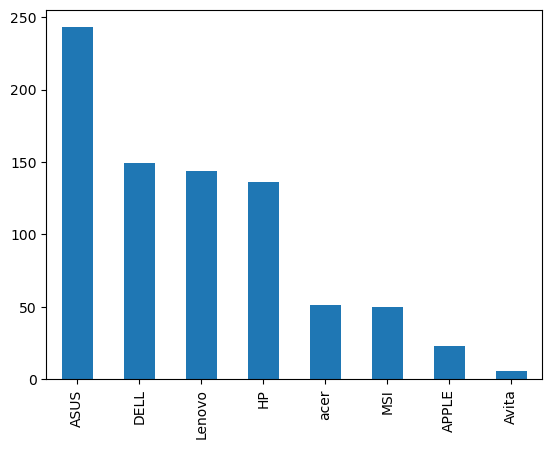

In [8]:
df['brand'].value_counts().plot(kind='bar')

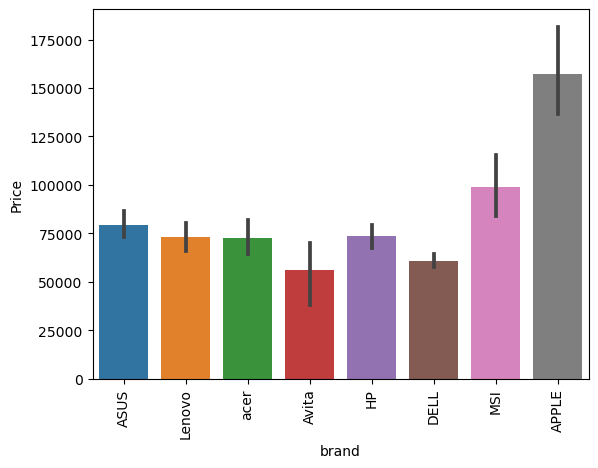

In [9]:
sns.barplot(x=df['brand'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [10]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


<Axes: >

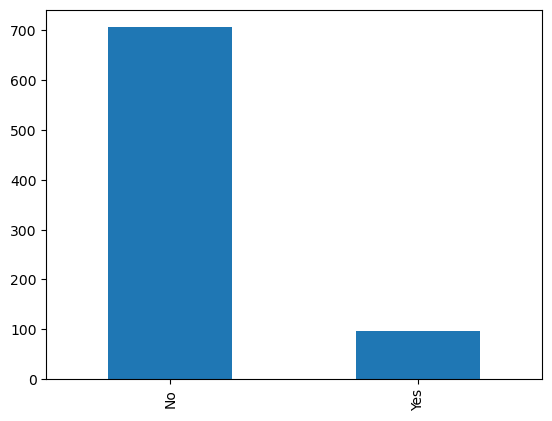

In [11]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

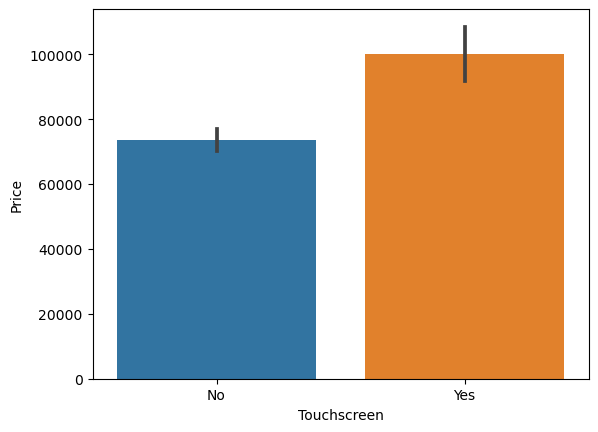

In [12]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [13]:
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})

In [14]:
df.corr()['Price']

Touchscreen          0.191227
Price                1.000000
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [15]:
df['ram_gb'] = df['ram_gb'].str.replace('GB','')
df['ram_gb'] = df['ram_gb'].astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    int32 
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    int64 
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 1

<Axes: >

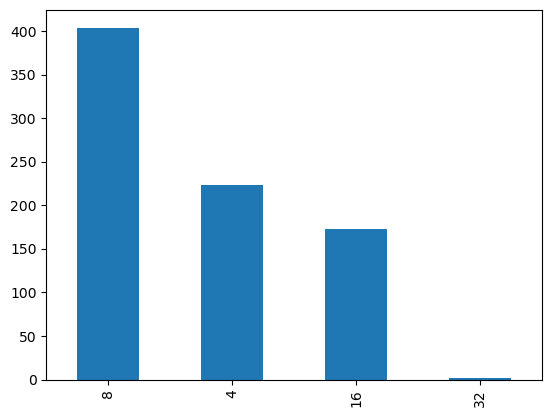

In [17]:
df['ram_gb'].value_counts().plot(kind='bar')

<Axes: xlabel='ram_gb', ylabel='Price'>

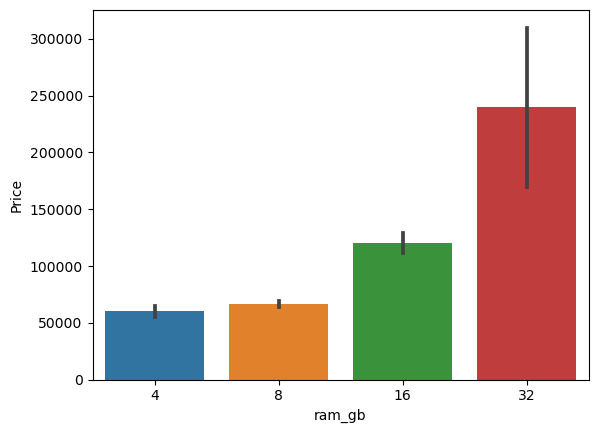

In [18]:
sns.barplot(x=df['ram_gb'],y=df['Price'])

In [19]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,0,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,0,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,0,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,0,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,0,No,142990,3 stars,0,0


In [20]:
df['processor_brand']

0      Intel
1      Intel
2      Intel
3      Intel
4      Intel
       ...  
818      AMD
819      AMD
820      AMD
821      AMD
822      AMD
Name: processor_brand, Length: 802, dtype: object

In [21]:
df['CPU Name'] = df['processor_brand'].apply(lambda x:" ".join(x.split()[0:3]))
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,CPU Name
0,ASUS,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,34649,2 stars,3,0,Intel
1,Lenovo,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,38999,3 stars,65,5,Intel
2,Lenovo,Intel,Core i3,10th,4,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,39999,3 stars,8,1,Intel
3,ASUS,Intel,Core i5,10th,8,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,0,No,69990,3 stars,0,0,Intel
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,0,No,26990,3 stars,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,0,No,135990,3 stars,0,0,AMD
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,0,No,144990,3 stars,0,0,AMD
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,0,No,149990,3 stars,0,0,AMD
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,0,No,142990,3 stars,0,0,AMD


In [22]:
def fetch_processor(text):
    if text=="Intel":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

<Axes: >

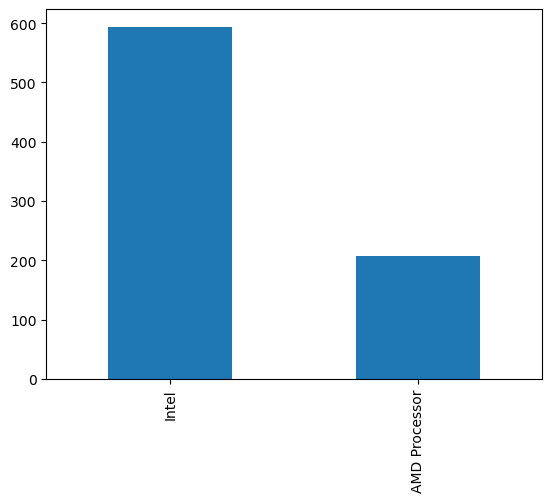

In [23]:
df['CPU Brand'] = df['CPU Name'].apply(fetch_processor)
df['CPU Brand'].value_counts().plot(kind='bar')

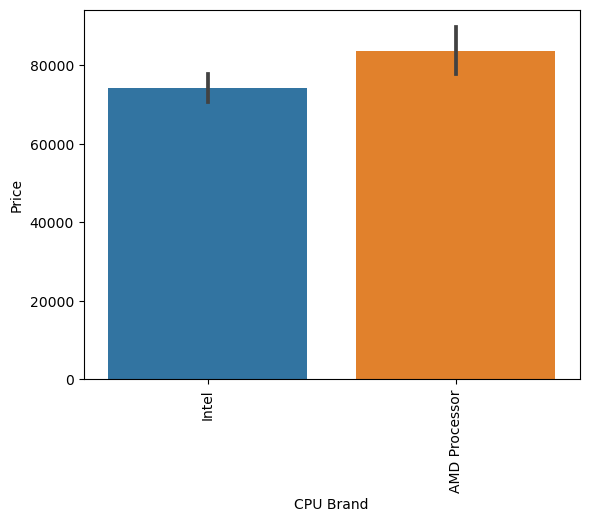

In [24]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
df.drop(columns=['CPU Name'],inplace=True)

In [26]:
df.corr()['Price']

ram_gb               0.516454
Touchscreen          0.191227
Price                1.000000
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [27]:
df['ssd'] = df['ssd'].str.replace('GB','')
df['hdd'] = df['hdd'].str.replace('GB','')
df['os_bit'] = df['os_bit'].str.replace('-bit','')

In [28]:
df['ssd'] = df['ssd'].astype('int32')
df['hdd'] = df['hdd'].astype('int32')
df['os_bit'] = df['os_bit'].astype('int32')

In [29]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,CPU Brand
0,ASUS,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,34649,2 stars,3,0,Intel
1,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,38999,3 stars,65,5,Intel
2,Lenovo,Intel,Core i3,10th,4,DDR4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,39999,3 stars,8,1,Intel
3,ASUS,Intel,Core i5,10th,8,DDR4,512,0,Windows,32,2 GB,Casual,No warranty,0,No,69990,3 stars,0,0,Intel
4,ASUS,Intel,Celeron Dual,Not Available,4,DDR4,0,512,Windows,64,0 GB,Casual,No warranty,0,No,26990,3 stars,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0 GB,Casual,1 year,0,No,135990,3 stars,0,0,AMD Processor
819,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,0 GB,Casual,1 year,0,No,144990,3 stars,0,0,AMD Processor
820,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4 GB,Casual,1 year,0,No,149990,3 stars,0,0,AMD Processor
821,ASUS,AMD,Ryzen 9,Not Available,4,DDR4,1024,0,Windows,64,4 GB,Casual,1 year,0,No,142990,3 stars,0,0,AMD Processor


In [30]:
df['ram_type'] = df['ram_type'].str.replace('DDR','')
df['ram_type'] = df['ram_type'].str.replace('LP','')
df['ram_type'] = df['ram_type'].str.replace('X','')
df['ram_type'] = df['ram_type'].astype('int32')
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,CPU Brand
0,ASUS,Intel,Core i3,10th,4,4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,34649,2 stars,3,0,Intel
1,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,38999,3 stars,65,5,Intel
2,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0 GB,Casual,No warranty,0,No,39999,3 stars,8,1,Intel
3,ASUS,Intel,Core i5,10th,8,4,512,0,Windows,32,2 GB,Casual,No warranty,0,No,69990,3 stars,0,0,Intel
4,ASUS,Intel,Celeron Dual,Not Available,4,4,0,512,Windows,64,0 GB,Casual,No warranty,0,No,26990,3 stars,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0 GB,Casual,1 year,0,No,135990,3 stars,0,0,AMD Processor
819,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0 GB,Casual,1 year,0,No,144990,3 stars,0,0,AMD Processor
820,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4 GB,Casual,1 year,0,No,149990,3 stars,0,0,AMD Processor
821,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4 GB,Casual,1 year,0,No,142990,3 stars,0,0,AMD Processor


In [31]:
df.corr()['Price']

ram_gb               0.516454
ram_type            -0.058300
ssd                  0.628734
hdd                 -0.251266
os_bit              -0.019731
Touchscreen          0.191227
Price                1.000000
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [32]:
df['rating'] = df['rating'].str.replace('star','')
df['rating'] = df['rating'].str.replace('s','')
df['rating'] = df['rating'].astype('int32')

In [33]:
df.corr()['Price']

ram_gb               0.516454
ram_type            -0.058300
ssd                  0.628734
hdd                 -0.251266
os_bit              -0.019731
Touchscreen          0.191227
Price                1.000000
rating              -0.040564
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [34]:
df['graphic_card_gb'] = df['graphic_card_gb'].str.replace('GB','')
df['graphic_card_gb'] = df['graphic_card_gb'].astype('int32')

In [35]:
df.corr()['Price']

ram_gb               0.516454
ram_type            -0.058300
ssd                  0.628734
hdd                 -0.251266
os_bit              -0.019731
graphic_card_gb      0.467499
Touchscreen          0.191227
Price                1.000000
rating              -0.040564
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    int32 
 5   ram_type           802 non-null    int32 
 6   ssd                802 non-null    int32 
 7   hdd                802 non-null    int32 
 8   os                 802 non-null    object
 9   os_bit             802 non-null    int32 
 10  graphic_card_gb    802 non-null    int32 
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    int64 
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    int32 
 1

In [37]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,CPU Brand
0,ASUS,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,No,34649,2,3,0,Intel
1,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,No,38999,3,65,5,Intel
2,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,No,39999,3,8,1,Intel
3,ASUS,Intel,Core i5,10th,8,4,512,0,Windows,32,2,Casual,No warranty,0,No,69990,3,0,0,Intel
4,ASUS,Intel,Celeron Dual,Not Available,4,4,0,512,Windows,64,0,Casual,No warranty,0,No,26990,3,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0,Casual,1 year,0,No,135990,3,0,0,AMD Processor
819,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0,Casual,1 year,0,No,144990,3,0,0,AMD Processor
820,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4,Casual,1 year,0,No,149990,3,0,0,AMD Processor
821,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4,Casual,1 year,0,No,142990,3,0,0,AMD Processor


In [38]:
df['msoffice'] = df['msoffice'].map({'Yes': 1, 'No': 0})

In [39]:
df.corr()['Price']

ram_gb               0.516454
ram_type            -0.058300
ssd                  0.628734
hdd                 -0.251266
os_bit              -0.019731
graphic_card_gb      0.467499
Touchscreen          0.191227
msoffice            -0.103783
Price                1.000000
rating              -0.040564
Number of Ratings   -0.152553
Number of Reviews   -0.156791
Name: Price, dtype: float64

In [40]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,CPU Brand
0,ASUS,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,0,34649,2,3,0,Intel
1,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,0,38999,3,65,5,Intel
2,Lenovo,Intel,Core i3,10th,4,4,0,1024,Windows,64,0,Casual,No warranty,0,0,39999,3,8,1,Intel
3,ASUS,Intel,Core i5,10th,8,4,512,0,Windows,32,2,Casual,No warranty,0,0,69990,3,0,0,Intel
4,ASUS,Intel,Celeron Dual,Not Available,4,4,0,512,Windows,64,0,Casual,No warranty,0,0,26990,3,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0,Casual,1 year,0,0,135990,3,0,0,AMD Processor
819,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,0,Casual,1 year,0,0,144990,3,0,0,AMD Processor
820,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4,Casual,1 year,0,0,149990,3,0,0,AMD Processor
821,ASUS,AMD,Ryzen 9,Not Available,4,4,1024,0,Windows,64,4,Casual,1 year,0,0,142990,3,0,0,AMD Processor


In [41]:
df.drop(columns=['processor_brand'],inplace=True)
df.drop(columns=['processor_name'],inplace=True)
df.drop(columns=['processor_gnrtn'],inplace=True)
df.drop(columns=['brand'],inplace=True)
df.drop(columns=['os'],inplace=True)
df.drop(columns=['weight'],inplace=True)
df.drop(columns=['warranty'],inplace=True)

In [42]:
df.drop(columns=['CPU Brand'],inplace=True)

In [43]:
df

,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,4,4,0,1024,64,0,0,0,34649,2,3,0
1,4,4,0,1024,64,0,0,0,38999,3,65,5
2,4,4,0,1024,64,0,0,0,39999,3,8,1
3,8,4,512,0,32,2,0,0,69990,3,0,0
4,4,4,0,512,64,0,0,0,26990,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
818,4,4,1024,0,64,0,0,0,135990,3,0,0
819,4,4,1024,0,64,0,0,0,144990,3,0,0
820,4,4,1024,0,64,4,0,0,149990,3,0,0
821,4,4,1024,0,64,4,0,0,142990,3,0,0


In [44]:
X= df[['ram_gb','ram_type','ssd','hdd','os_bit','graphic_card_gb','Touchscreen','msoffice','rating','Number of Ratings','Number of Reviews']]
X.head()

,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,Touchscreen,msoffice,rating,Number of Ratings,Number of Reviews
0,4,4,0,1024,64,0,0,0,2,3,0
1,4,4,0,1024,64,0,0,0,3,65,5
2,4,4,0,1024,64,0,0,0,3,8,1
3,8,4,512,0,32,2,0,0,3,0,0
4,4,4,0,512,64,0,0,0,3,0,0


In [45]:
Y= np.where(df['Price'].shift(-1)>df['Price'],1,-1)

In [46]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [47]:
#decisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print(model)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

DecisionTreeClassifier()
Train_data Accuracy: 0.94
Test_data Accuracy: 0.56


In [48]:
probability = model.predict_proba(X_test)
print(probability)

[[0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]


In [49]:
predicted = model.predict(X_test)
predicted

array([ 1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1, -1

In [50]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))
print(metrics.classification_report(Y_test, predicted))

[[60 53]
 [54 74]]
              precision    recall  f1-score   support

          -1       0.53      0.53      0.53       113
           1       0.58      0.58      0.58       128

    accuracy                           0.56       241
   macro avg       0.55      0.55      0.55       241
weighted avg       0.56      0.56      0.56       241



In [51]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.62
Test_data Accuracy: 0.58


In [52]:
probability = knn.predict_proba(X_test)
print(probability)

[[0.4        0.6       ]
 [0.53333333 0.46666667]
 [0.46666667 0.53333333]
 [0.53333333 0.46666667]
 [0.4        0.6       ]
 [0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.53333333 0.46666667]
 [0.33333333 0.66666667]
 [0.53333333 0.46666667]
 [0.6        0.4       ]
 [0.6        0.4       ]
 [0.53333333 0.46666667]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]
 [0.46666667 0.53333333]
 [0.4        0.6       ]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.6        0.4       ]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.33333333 0.66666667]
 [0.6        0.4       ]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.46666667 0.53333333]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.4        0.6       ]
 [0.4        0.6       ]


In [53]:
predicted = knn.predict(X_test)

In [54]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, predicted))
print(metrics.classification_report(Y_test, predicted))

[[67 46]
 [56 72]]
              precision    recall  f1-score   support

          -1       0.54      0.59      0.57       113
           1       0.61      0.56      0.59       128

    accuracy                           0.58       241
   macro avg       0.58      0.58      0.58       241
weighted avg       0.58      0.58      0.58       241



In [55]:
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr = lr.fit (X_train,Y_train)
accuracy_train = accuracy_score(Y_train, lr.predict(X_train))
accuracy_test = accuracy_score(Y_test, lr.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.61
Test_data Accuracy: 0.51


In [56]:
probability = lr.predict_proba(X_test)
print(probability)

[[0.74002396 0.25997604]
 [0.73046859 0.26953141]
 [0.51078128 0.48921872]
 [0.71722112 0.28277888]
 [0.59754522 0.40245478]
 [0.47459709 0.52540291]
 [0.69949664 0.30050336]
 [0.65450187 0.34549813]
 [0.62124381 0.37875619]
 [0.57411441 0.42588559]
 [0.82923485 0.17076515]
 [0.51958432 0.48041568]
 [0.51958432 0.48041568]
 [0.44689892 0.55310108]
 [0.65515142 0.34484858]
 [0.51958432 0.48041568]
 [0.48444123 0.51555877]
 [0.08295492 0.91704508]
 [0.56124346 0.43875654]
 [0.58957305 0.41042695]
 [0.57882331 0.42117669]
 [0.73585068 0.26414932]
 [0.23631492 0.76368508]
 [0.47505141 0.52494859]
 [0.68477354 0.31522646]
 [0.64555045 0.35444955]
 [0.57330267 0.42669733]
 [0.41493955 0.58506045]
 [0.385015   0.614985  ]
 [0.385015   0.614985  ]
 [0.18585243 0.81414757]
 [0.41493955 0.58506045]
 [0.615762   0.384238  ]
 [0.60950553 0.39049447]
 [0.60950553 0.39049447]
 [0.35950261 0.64049739]
 [0.26649621 0.73350379]
 [0.42236847 0.57763153]
 [0.45929957 0.54070043]
 [0.45929957 0.54070043]


In [57]:
predic = lr.predict(X_test)
print(metrics.confusion_matrix(Y_test, predic))
print(metrics.classification_report(Y_test, predic))

[[34 79]
 [39 89]]
              precision    recall  f1-score   support

          -1       0.47      0.30      0.37       113
           1       0.53      0.70      0.60       128

    accuracy                           0.51       241
   macro avg       0.50      0.50      0.48       241
weighted avg       0.50      0.51      0.49       241



In [58]:
#RandomForest
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=16)
rfc.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, rfc.predict(X_train))
accuracy_test = accuracy_score(Y_test, rfc.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.93
Test_data Accuracy: 0.58


In [59]:
probability = rfc.predict_proba(X_test)
print(probability)

[[0.50833333 0.49166667]
 [0.678125   0.321875  ]
 [0.875      0.125     ]
 [0.6875     0.3125    ]
 [0.51339286 0.48660714]
 [0.75       0.25      ]
 [0.865625   0.134375  ]
 [0.64930556 0.35069444]
 [0.5        0.5       ]
 [0.25       0.75      ]
 [0.75       0.25      ]
 [0.17916667 0.82083333]
 [0.17916667 0.82083333]
 [0.45416667 0.54583333]
 [0.3125     0.6875    ]
 [0.17916667 0.82083333]
 [0.5        0.5       ]
 [0.125      0.875     ]
 [0.8125     0.1875    ]
 [0.75       0.25      ]
 [0.625      0.375     ]
 [0.5        0.5       ]
 [0.625      0.375     ]
 [0.25       0.75      ]
 [0.6875     0.3125    ]
 [0.5625     0.4375    ]
 [0.5625     0.4375    ]
 [0.3125     0.6875    ]
 [0.25       0.75      ]
 [0.25       0.75      ]
 [0.375      0.625     ]
 [0.3125     0.6875    ]
 [0.375      0.625     ]
 [0.3125     0.6875    ]
 [0.3125     0.6875    ]
 [0.1875     0.8125    ]
 [0.1875     0.8125    ]
 [0.4375     0.5625    ]
 [0.25       0.75      ]
 [0.25       0.75      ]


In [60]:
from sklearn.metrics import confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, rfc_pred))

[[66 47]
 [54 74]]
              precision    recall  f1-score   support

          -1       0.55      0.58      0.57       113
           1       0.61      0.58      0.59       128

    accuracy                           0.58       241
   macro avg       0.58      0.58      0.58       241
weighted avg       0.58      0.58      0.58       241



In [61]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
#Initializing the MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(600,300,150), max_iter=300,activation = 'relu',solver='adam',random_state=1)

#Fitting the training data to the network
mlp.fit(X_train, Y_train)
accuracy_Train = accuracy_score(Y_train, mlp.predict(X_train))
accuracy_Test = accuracy_score(Y_test, mlp.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.57
Test_data Accuracy: 0.53


In [62]:
from sklearn.metrics import confusion_matrix
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(Y_test, mlp_pred))

[[84 29]
 [85 43]]


In [63]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, mlp_pred))

              precision    recall  f1-score   support

          -1       0.50      0.74      0.60       113
           1       0.60      0.34      0.43       128

    accuracy                           0.53       241
   macro avg       0.55      0.54      0.51       241
weighted avg       0.55      0.53      0.51       241



In [64]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)
accuracy_Train = accuracy_score(Y_train, gb.predict(X_train))
accuracy_Test = accuracy_score(Y_test, gb.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_Train)
print ('Test_data Accuracy: %.2f' %accuracy_Test)

Train_data Accuracy: 0.55
Test_data Accuracy: 0.52


In [65]:
from sklearn.metrics import confusion_matrix
gb_pred = gb.predict(X_test)
print(confusion_matrix(Y_test, gb_pred))

[[102  11]
 [104  24]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_pred))

              precision    recall  f1-score   support

          -1       0.50      0.90      0.64       113
           1       0.69      0.19      0.29       128

    accuracy                           0.52       241
   macro avg       0.59      0.55      0.47       241
weighted avg       0.60      0.52      0.46       241



In [67]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,Y_train)

SVC(kernel='linear', random_state=0)

In [68]:
# accuracy score, confusion matrix and classification report of knn

sv_acc = accuracy_score(Y_test, sv.predict(X_test))

print(f"Training Accuracy of SVM is {accuracy_score(Y_train, sv.predict(X_train))}")
print(f"Test Accuracy of SVM is {sv_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, sv.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(Y_test, sv.predict(X_test))}")

Training Accuracy of SVM is 0.6096256684491979
Test Accuracy of SVM is 0.5518672199170125 

Confusion Matrix :- 
[[ 33  80]
 [ 28 100]]

Classification Report :- 
               precision    recall  f1-score   support

          -1       0.54      0.29      0.38       113
           1       0.56      0.78      0.65       128

    accuracy                           0.55       241
   macro avg       0.55      0.54      0.51       241
weighted avg       0.55      0.55      0.52       241

